Cleaning Dataset

Import Library


In [379]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Read Dataset

In [380]:
dataset_df = pd.read_csv("Dataset/House_price_prediction.csv")
print("Shape:{}" .format(dataset_df.shape))

Shape:(4600, 18)


In [381]:
dataset_df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [382]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Cleaning data

regularizing The categorical Columns

In [383]:
for column in dataset_df.columns:
    print(f"Column:{column}: {dataset_df[column].unique()} value")

Column:date: ['2014-05-02 00:00:00' '2014-05-03 00:00:00' '2014-05-04 00:00:00'
 '2014-05-05 00:00:00' '2014-05-06 00:00:00' '2014-05-07 00:00:00'
 '2014-05-08 00:00:00' '2014-05-09 00:00:00' '2014-05-10 00:00:00'
 '2014-05-11 00:00:00' '2014-05-12 00:00:00' '2014-05-13 00:00:00'
 '2014-05-14 00:00:00' '2014-05-15 00:00:00' '2014-05-16 00:00:00'
 '2014-05-17 00:00:00' '2014-05-18 00:00:00' '2014-05-19 00:00:00'
 '2014-05-20 00:00:00' '2014-05-21 00:00:00' '2014-05-22 00:00:00'
 '2014-05-23 00:00:00' '2014-05-24 00:00:00' '2014-05-25 00:00:00'
 '2014-05-26 00:00:00' '2014-05-27 00:00:00' '2014-05-28 00:00:00'
 '2014-05-29 00:00:00' '2014-05-30 00:00:00' '2014-05-31 00:00:00'
 '2014-06-01 00:00:00' '2014-06-02 00:00:00' '2014-06-03 00:00:00'
 '2014-06-04 00:00:00' '2014-06-05 00:00:00' '2014-06-06 00:00:00'
 '2014-06-07 00:00:00' '2014-06-08 00:00:00' '2014-06-09 00:00:00'
 '2014-06-10 00:00:00' '2014-06-11 00:00:00' '2014-06-12 00:00:00'
 '2014-06-13 00:00:00' '2014-06-14 00:00:00' '201

Missing data Handing

Corralated Matrix

In [384]:
# Chuyển đổi các cột kiểu object thành số
label_encoders = {}
for column in dataset_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_df[column] = le.fit_transform(dataset_df[column])
    label_encoders[column] = le


Check for outlier

In [385]:
def remove_outliers(df, column):
    # Tính các quartile đầu tiên (Q1) và thứ ba (Q3)
    Q1 = np.percentile(df[column], 15)
    Q3 = np.percentile(df[column], 85)
    
    # Tính IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Xác định giới hạn dưới và giới hạn trên để xác định outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc các giá trị nằm ngoài khoảng [lower_bound, upper_bound]
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

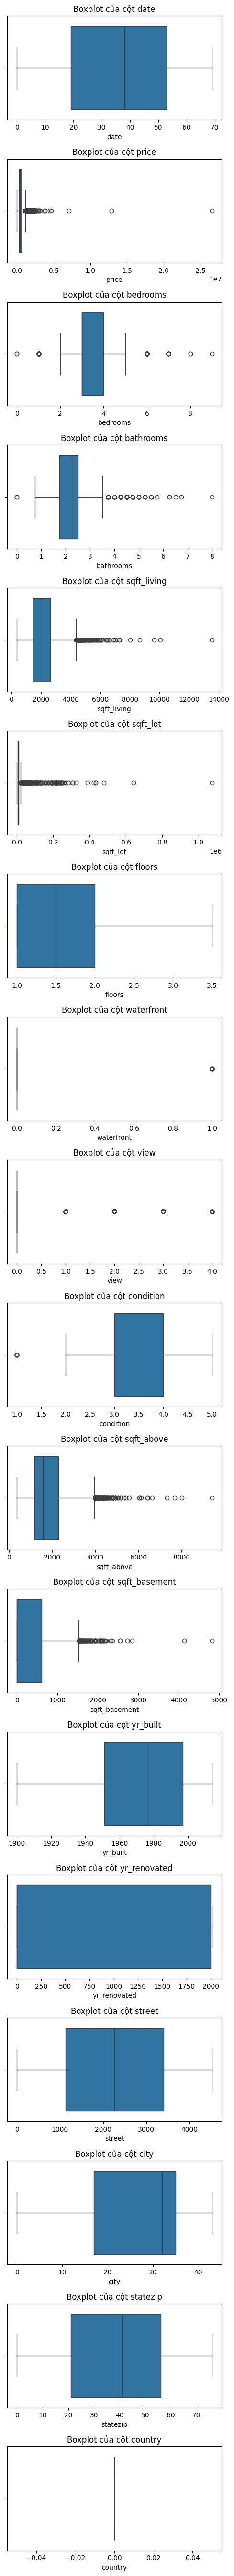

In [386]:
# Xác định số lượng cột trong DataFrame
num_columns = len(dataset_df.columns)

# Thiết lập figure và các subplots với kích thước nhỏ hơn
plt.figure(figsize=(5, 3 * num_columns))  # Điều chỉnh kích thước figure

# Vẽ boxplot cho mỗi cột
for i, column in enumerate(dataset_df.columns):
    plt.subplot(num_columns, 1, i + 1)  # (số hàng, số cột, vị trí)
    sns.boxplot(x=dataset_df[column])
    plt.title(f'Boxplot của cột {column}')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh layout để tránh chồng chéo
plt.show()

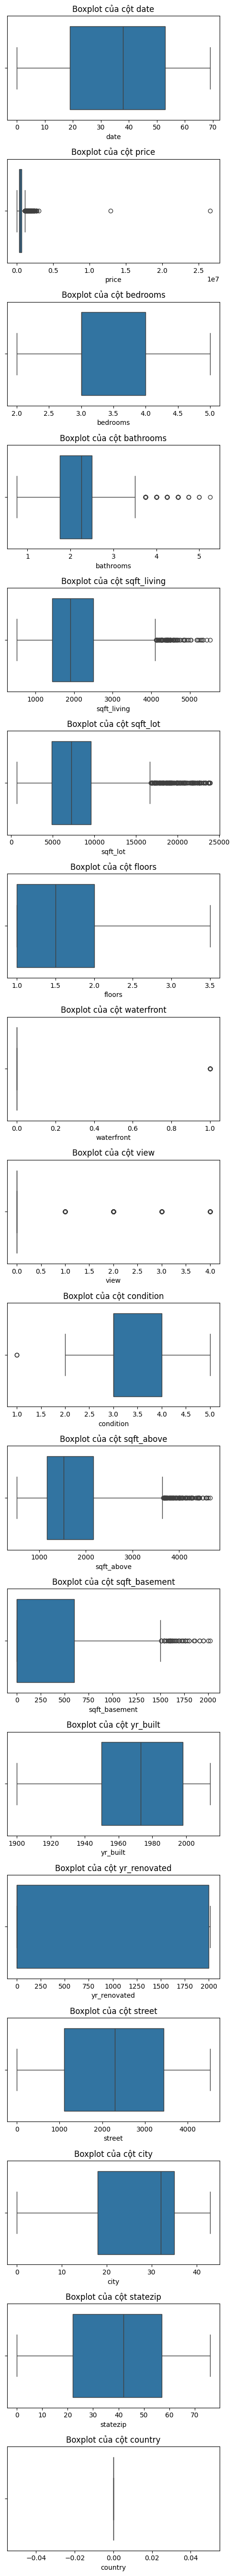

In [387]:
dataset_df = remove_outliers(dataset_df, 'bedrooms')
dataset_df = remove_outliers(dataset_df, 'bathrooms')
dataset_df = remove_outliers(dataset_df, 'sqft_living')
dataset_df = remove_outliers(dataset_df, 'sqft_lot')
dataset_df = remove_outliers(dataset_df, 'sqft_lot')
dataset_df = remove_outliers(dataset_df, 'sqft_basement')

num_columns = len(dataset_df.columns)

# Thiết lập figure và các subplots với kích thước nhỏ hơn
plt.figure(figsize=(5, 3 * num_columns))  # Điều chỉnh kích thước figure

# Vẽ boxplot cho mỗi cột
for i, column in enumerate(dataset_df.columns):
    plt.subplot(num_columns, 1, i + 1)  # (số hàng, số cột, vị trí)
    sns.boxplot(x=dataset_df[column])
    plt.title(f'Boxplot của cột {column}')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh layout để tránh chồng chéo
plt.show()


Save Cleaned Data

In [388]:
# Lưu lại kết quả sau khi loại bỏ outliers vào file CSV mới
dataset_df.to_csv('./Dataset/Cleaned_data.csv', index=False)

Data Analyst and Preprocessing

In [389]:
dataset_df = pd.read_csv("Dataset/Cleaned_data.csv")
print("Shape:{}" .format(dataset_df.shape))

Shape:(4021, 18)


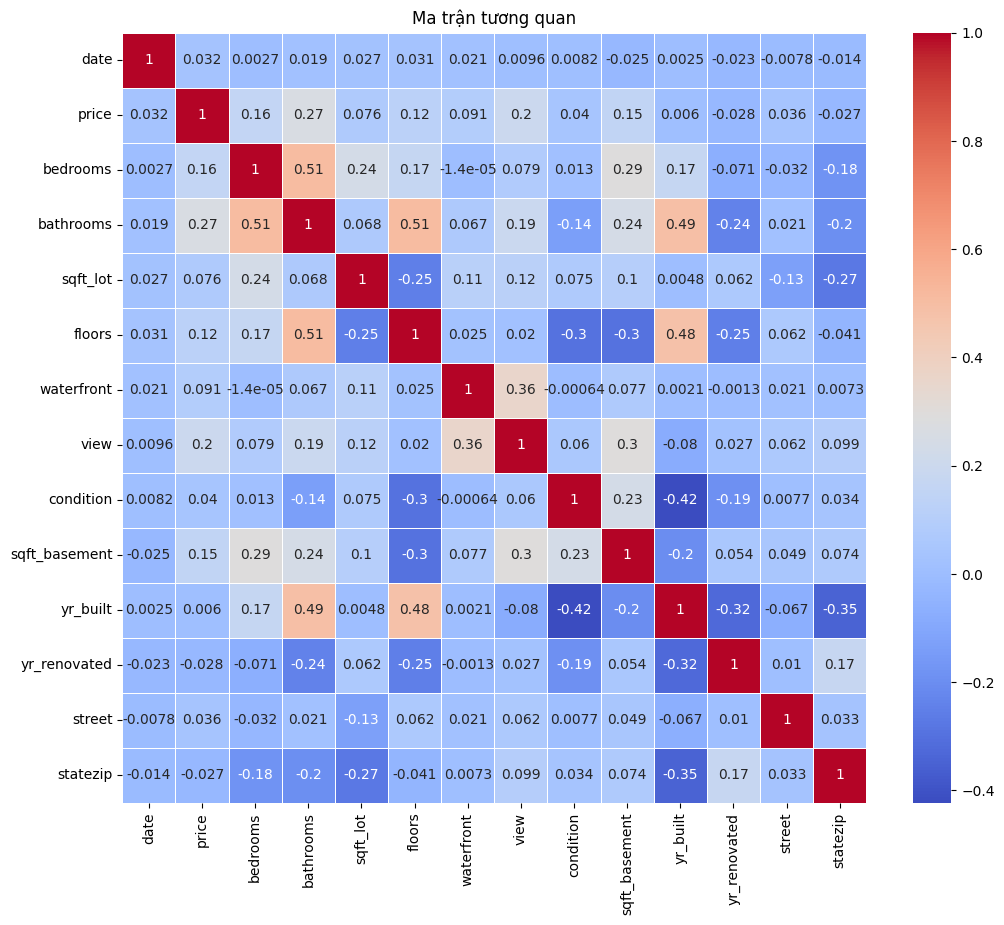

In [401]:
corr_matrix = dataset_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan')
plt.show()

Feature Selection


In [391]:
dataset_df = dataset_df.drop(columns=['sqft_living', 'sqft_above', 'city', 'country'])

Perform Train-Test Spit (70-30)

In [392]:

X = dataset_df.drop(columns=['price'])  # Loại bỏ cột mục tiêu khỏi tập đặc trưng
y = dataset_df['price']  # Cột mục tiêu

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model and Evaluation

Multi-layer perceptron (MLP)

In [393]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 886571949659.8445
R-squared Score (R²): -0.33822956155796113


c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Support Vector Regressor 

In [394]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 672411541399.1199
R-squared Score (R²): -0.014966695684770492


K-Nearest Neighbors Regressor

In [395]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 647458929290.3549
R-squared Score (R²): 0.022697842624669895


XGBoost

In [396]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 618803139089.8192
R-squared Score (R²): 0.06595211608873897


Elatic Net

In [397]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 631670456706.2897
R-squared Score (R²): 0.0465296373841928


Lasso Regression

In [398]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 632004938461.2076
R-squared Score (R²): 0.046024756339394624


Ridge Regression

In [399]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 632001267661.7408
R-squared Score (R²): 0.04603029720086993


Linear Regression

In [400]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 632004951694.0851
R-squared Score (R²): 0.046024736365124386
